In [185]:
import pandas as pd
from pandas import DataFrame, cut
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, mannwhitneyu, shapiro, zscore

## Task 1: Creating function to read and join all tables

In [236]:
def read_data(directory, extension):
    directory = os.fsencode(directory)
    all_data = pd.DataFrame(columns=['ID','Name','Sex','Age',
                                     'Height','Weight','Team',
                                     'NOC','Games','Year','Season',
                                     'City','Sport','Event','Medal'])
    
    all_data = all_data.astype({'Height': 'int', 'Age': 'int', 'Weight': 'int', 'Year': 'int'})
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        path_to_file = f'olympic_games_folder/data_folder/{filename}'
        if path_to_file.endswith(extension):
            current_df = pd.read_csv(path_to_file)
            all_data = pd.concat([all_data, current_df], axis = 0)
            all_data = all_data.drop_duplicates()
    return all_data

olympics_dataset = read_data('olympic_games_folder/data_folder', 'csv')

In [237]:
len(olympics_dataset)

269730

## Task 2: cheching if all data is correct

Descripton of features:

- ID – Unique number for each athlete
- Name – Athlete's name
- Sex – M or F
- Age – Integer
- Height – In centimeters
- Weight – In kilograms
- Team – Team name
- NOC – National Olympic Committee 3-letter code
- Games – Year and season
- Year – Integer
- Season – Summer or Winter
- City – Host city
- Sport – Sport
- Event – Event
- Medal – Gold, Silver, Bronze, or NA

**First, let's check if all people have F or M sex values. If people have strange sex values, change those values according to their names/google.**

In my case there are two persons with 'G' sex. Maybe they are non-binary or transexual, but such values is not allowed in this dataset.

### 2.1: Sex

In [187]:
olympics_dataset[(olympics_dataset['Sex'] != 'M') & (olympics_dataset['Sex'] != 'F')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,79609,Pavel Mike,G,22.0,182.0,79.0,Czechoslovakia,TCH,1972 Summer,1972.0,Summer,Munich,Handball,Handball Men's Handball,Silver
74,79630,Anatoly Mikhaylin,G,37.0,NaN,NaN,Russia,RUS,1996 Summer,1996.0,Summer,Atlanta,Sailing,Sailing Mixed Two Person Keelboat,NaN
22409,113716,Pietro Spec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22463,124516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
olympics_dataset['Sex'] = olympics_dataset['Sex'].replace(['G'], 'M')
olympics_dataset.drop([22409, 22463], axis=0, inplace=True) # Delete rows containing only NaNs while we here

In [189]:
olympics_dataset[(olympics_dataset['Sex'] != 'M') & (olympics_dataset['Sex'] != 'F')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


**Next, let's check if all the ages, hights and weights seem realistic and normal.** For this purpouse I will use describe function plus I'll draw simple boxplots: I think it is easier to visually inspect and detect how many outliers are there.

I decided to remove all unrealistic data because it can potentially harm further data analysis. Also we have large dataset and can afford deliting a few records. As an alternative you can replace those values with median value among people in that age, sex and sport type.

In [190]:
pd.DataFrame.describe(olympics_dataset)

,Age,Height,Weight,Year
count,260394.000000,210900.000000,208187.000000,269704.000000
mean,25.455590,175.339474,70.701547,1978.622534
std,6.178156,10.524683,14.350048,29.752093
min,10.000000,127.000000,7.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,240.000000,340.000000,214.000000,2016.000000


### 2.2: Age

In [191]:
olympics_dataset = olympics_dataset[(olympics_dataset['Age'] != 240)]

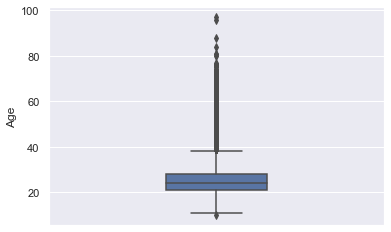

In [192]:
sns.boxplot(y = olympics_dataset['Age'], width = 0.3);

### 2.3: Height

In [193]:
olympics_dataset = olympics_dataset[(olympics_dataset['Height'] != 340)]

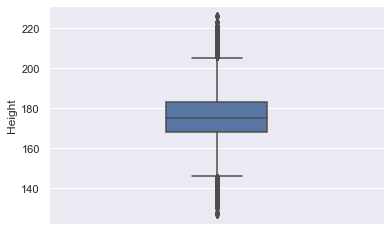

In [194]:
sns.boxplot(y = olympics_dataset['Height'], width = 0.3);

### 2.4: Weight

In [195]:
olympics_dataset = olympics_dataset[(olympics_dataset['Weight'] != 7)]

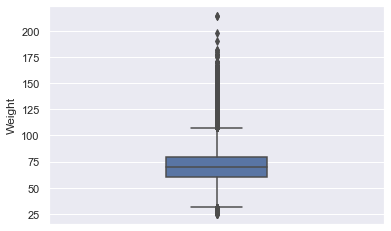

In [196]:
sns.boxplot(y = olympics_dataset['Weight'], width = 0.3);

**After this, inspect all other features, in case you want to avoid certain values**

### 2.5: Team

In [197]:
olympics_dataset.Team.unique().tolist()[200:210]

['Great Britain-1',
 'Namibia',
 'Rose Pompon',
 'France-3',
 'Cape Verde',
 'Netherlands Antilles',
 'Mongolia',
 "Cote d'Ivoire",
 'Sarcelle-35',
 'Sarcelle-3']

### 2.6: NOC

In [199]:
olympics_dataset.NOC.unique().tolist()[1:10]

['YUG', 'NED', 'SCG', 'DEN', 'POL', 'GRE', 'SWE', 'TCH', 'JPN']

### 2.7: Games

In [200]:
olympics_dataset.Games.unique().tolist()

['1960 Summer',
 '1948 Summer',
 '1928 Summer',
 '2000 Summer',
 '2004 Summer',
 '1964 Summer',
 '1968 Summer',
 '2016 Summer',
 '1952 Summer',
 '1972 Winter',
 '1920 Summer',
 '1992 Winter',
 '1996 Summer',
 '1998 Winter',
 '1972 Summer',
 '2010 Winter',
 '2014 Winter',
 '2008 Summer',
 '2012 Summer',
 '1956 Summer',
 '1976 Summer',
 '1992 Summer',
 '1896 Summer',
 '1988 Summer',
 '1984 Summer',
 '1906 Summer',
 '2002 Winter',
 '1976 Winter',
 '1980 Winter',
 '1936 Summer',
 '1956 Winter',
 '1980 Summer',
 '1964 Winter',
 '1994 Winter',
 '1968 Winter',
 '1932 Winter',
 '1936 Winter',
 '1984 Winter',
 '1988 Winter',
 '1908 Summer',
 '1932 Summer',
 '1924 Summer',
 '1928 Winter',
 '1912 Summer',
 '2006 Winter',
 '1960 Winter',
 '1900 Summer',
 '1952 Winter',
 '1904 Summer',
 '1948 Winter',
 '1924 Winter',
 '2000 Su',
 '2004 Summe',
 nan]

In [201]:
olympics_dataset['Games'] = olympics_dataset['Games'].replace(['2000 Su'], '2000 Summer')

### 2.8: Year

In [202]:
olympics_dataset.Year.unique().tolist()

[1960.0,
 1948.0,
 1928.0,
 2000.0,
 2004.0,
 1964.0,
 1968.0,
 2016.0,
 1952.0,
 1972.0,
 1920.0,
 1992.0,
 1996.0,
 1998.0,
 2010.0,
 2014.0,
 2008.0,
 2012.0,
 1956.0,
 1976.0,
 1896.0,
 1988.0,
 1984.0,
 1906.0,
 2002.0,
 1980.0,
 1936.0,
 1994.0,
 1932.0,
 1908.0,
 1924.0,
 1912.0,
 2006.0,
 1900.0,
 1904.0,
 nan]

### 2.9: Season

In [203]:
olympics_dataset.Season.unique().tolist()

['Summer', 'Winter', nan]

### 2.10: City

In [204]:
olympics_dataset.City.unique().tolist()

['Roma',
 'London',
 'Amsterdam',
 'Sydney',
 'Athina',
 'Tokyo',
 'Mexico City',
 'Rio de Janeiro',
 'Helsinki',
 'Sapporo',
 'Antwerpen',
 'Albertville',
 'Atlanta',
 'Nagano',
 'Munich',
 'Vancouver',
 'Sochi',
 'Beijing',
 'Melbourne',
 'Montreal',
 'Barcelona',
 'Seoul',
 'Los Angeles',
 'Salt Lake City',
 'Innsbruck',
 'Lake Placid',
 'Berlin',
 "Cortina d'Ampezzo",
 'Moskva',
 'Lillehammer',
 'Grenoble',
 'Garmisch-Partenkirchen',
 'Sarajevo',
 'Calgary',
 'Paris',
 'Sankt Moritz',
 'Stockholm',
 'Torino',
 'Squaw Valley',
 'Oslo',
 'St. Louis',
 'Chamonix',
 nan]

### 2.11: Sport

In [205]:
olympics_dataset.Sport.unique().tolist()

['Athletics',
 'Gymnastics',
 'Fencing',
 'Volleyball',
 'Hockey',
 'Sailing',
 'Boxing',
 'Alpine Skiing',
 'Nordic Combined',
 'Basketball',
 'Cross Country Skiing',
 'Canoeing',
 'Shooting',
 'Football',
 'Handball',
 'Swimming',
 'Weightlifting',
 'Rowing',
 'Beach Volleyball',
 'Water Polo',
 'Wrestling',
 'Ice Hockey',
 'Judo',
 'Freestyle Skiing',
 'Art Competitions',
 'Cycling',
 'Speed Skating',
 'Table Tennis',
 'Short Track Speed Skating',
 'Luge',
 'Equestrianism',
 'Ski Jumping',
 'Rugby Sevens',
 'Taekwondo',
 'Archery',
 'Biathlon',
 'Figure Skating',
 'Rhythmic Gymnastics',
 'Softball',
 'Baseball',
 'Bobsleigh',
 'Jeu De Paume',
 'Polo',
 'Diving',
 'Tennis',
 'Tug-Of-War',
 'Curling',
 'Modern Pentathlon',
 'Skeleton',
 'Triathlon',
 'Synchronized Swimming',
 'Military Ski Patrol',
 'Badminton',
 'Snowboarding',
 'Trampolining',
 'Golf',
 'Alpinism',
 'Rugby',
 'Lacrosse',
 'Racquets',
 'Croquet',
 'Footba',
 'Cricket',
 'Motorboating',
 nan,
 'Roque',
 'Basque Pelota

### 2.12: Event

In [206]:
olympics_dataset.Event.unique().tolist()[345:360]

["Shooting Men's Free Pistol, 50 metres, Team",
 "Wrestling Men's Lightweight, Freestyle",
 "Canoeing Men's Canadian Singles, 500 metres",
 "Skeleton Women's Skeleton",
 "Shooting Men's Small-Bore Rifle, Three Positions, 50 metres",
 "Diving Women's Platform",
 "Boxing Men's Super-Heavyweight",
 "Freestyle Skiing Women's Slopestyle",
 "Tennis Women's Doubles",
 "Boxing Women's Flyweight",
 'Art Competitions Mixed Literature',
 'Art Competitions Mixed Literature, Unknown Event',
 "Judo Men's Middleweight",
 "Speed Skating Women's 1,500 metres",
 "Speed Skating Women's 3,000 metres"]

### 2.13: Medal

In [207]:
olympics_dataset.Medal.unique().tolist()

[nan, 'Gold', 'Silver', 'Bronze']

### 2.14 Dealing with NaNs

In [208]:
olympics_dataset.isna().sum() #Amount of NaNs in each column

ID             0
Name           0
Sex            0
Age         9315
Height     58808
Weight     61521
Team           0
NOC            1
Games          2
Year           4
Season         4
City           4
Sport          4
Event          5
Medal     229936
dtype: int64

In [209]:
olympics_dataset[olympics_dataset['City'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
22835,12005,Andrea Melissa Blackett,F,24.0,167.0,59.0,Barbados,BAR,2000 Summer,NaN,NaN,NaN,NaN,NaN,NaN
22586,23433,Hadj Moussa Coulibaly,M,23.0,NaN,NaN,Mali,MLI,2004 Summe,NaN,NaN,NaN,NaN,NaN,NaN
22557,34727,Carlotta Ferlito,F,17.0,160.0,50.0,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22659,45919,Yuka Harada,F,28.0,170.0,60.0,Japan,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Although there are some lines that contain a lot of NaN's, I decided to left them in dataset because they still have some information that can be used in further analysis

In [210]:
len(olympics_dataset) # New length of dataset, minus 24 rows from original dataset

269706

## Task 3: Finding youngest contestants in both sexes

In [211]:
olympics_dataset.groupby('Sex')['Age'].min()

Sex
F    11.0
M    10.0
Name: Age, dtype: float64

In [212]:
olymp_1992 = olympics_dataset[(olympics_dataset['Year'] == 1992)]
youngest = olymp_1992.groupby('Sex')['Age'].min()

In [213]:
olymp_1992[(olymp_1992['Sex'] == 'F') &
           (olymp_1992['Age'] == youngest['F'])] # The youngest female contestant

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6990,60854,Judit Kiss,F,12.0,171.0,57.0,Hungary,HUN,1992 Summer,1992.0,Summer,Barcelona,Swimming,Swimming Women's 400 metres Freestyle,NaN
6991,60854,Judit Kiss,F,12.0,171.0,57.0,Hungary,HUN,1992 Summer,1992.0,Summer,Barcelona,Swimming,Swimming Women's 800 metres Freestyle,NaN


In [214]:
olymp_1992[(olymp_1992['Sex'] == 'M') &
           (olymp_1992['Age'] == youngest['M'])] # The youngest male contestant

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
5480,37333,Carlos Bienvenido Front Barrera,M,11.0,NaN,NaN,Spain,ESP,1992 Summer,1992.0,Summer,Barcelona,Rowing,Rowing Men's Coxed Eights,NaN


## Task 4: Finding mean and standart deviation of heights of contestants

In [215]:
olymp_1992.groupby('Sex')['Height'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,4130.0,168.297337,8.799602,136.0,163.0,168.0,174.0,204.0
M,9108.0,179.746596,9.451785,140.0,174.0,180.0,186.0,223.0


## Task 5: Find mean and std of heights of female tennis contestants that were at 2000 Olympics games

In [216]:
tennis_girls_2000 = olympics_dataset[(olympics_dataset['Year'] == 2000) &
                                     (olympics_dataset['Sex'] == 'F') &
                                     (olympics_dataset['Sport'] == 'Tennis')]

In [217]:
print('Standart deviation of height for females at tennis 2000 Olypics games is:', tennis_girls_2000['Height'].std().round(1))
print('Mean of height for females at tennis 2000 Olypics games is:', tennis_girls_2000['Height'].mean().round(1))

Standart deviation of height for females at tennis 2000 Olypics games is: 6.5
Mean of height for females at tennis 2000 Olypics games is: 171.8


## Task 6: In what sport the heaviest contestant participated at 2006 Olympics?

In [222]:
olymp_2006 = olympics_dataset[(olympics_dataset['Year'] == 2006)]
max_weight = olymp_2006['Weight'].max()
olymp_2006[(olymp_2006['Weight'] == max_weight)].iloc[:1]
heaviest_person = olymp_2006[(olymp_2006['Weight'] == max_weight)].iloc[:1]
print('The heaviest person that participated in Olympics games was', heaviest_person.Name.values[0], 'And he participated in', heaviest_person.Sport.values[0])

The heaviest person that participated in Olympics games was Patrick R. Antaki And he participated in Skeleton


## Task 7: How many gold medals women recieved in 1980-2010 years.

In [223]:
golden_women = olympics_dataset[(olympics_dataset['Sex'] == 'F') &
                                (olympics_dataset['Medal'] == 'Gold') &
                                (olympics_dataset['Year'] >= 1980) &
                                (olympics_dataset['Year'] <= 2010)]
print('From 1980 to 2010 years', len(golden_women), 'women recieved gold medals')

From 1980 to 2010 years 2249 women recieved gold medals


## Task 8: How many times John Aalberg participated in Olympics games?

In [224]:
john_participated = olympics_dataset[(olympics_dataset['Name'] == 'John Aalberg')].Games.unique().tolist()
print('John Aalberg participated', len(john_participated), 'times')

John Aalberg participated 2 times


## Task 9: What age group is most represents at the Olympics ganes throught the years?

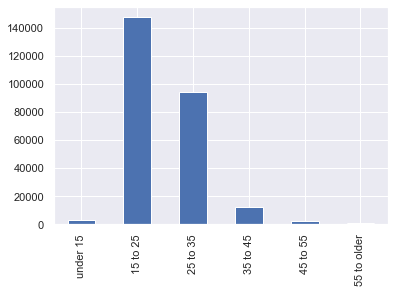

In [225]:
olympics_dataset['bin'] = cut(olympics_dataset['Age'],
                              [0, 15, 25, 35, 45, 55, float('inf')],
                              labels=['under 15', '15 to 25', '25 to 35', '35 to 45', '45 to 55', '55 to older'])

olympics_dataset['bin'].value_counts().sort_index().plot.bar();

In [226]:
most_represented = olympics_dataset['bin'].value_counts().iloc[:1]
print('The most represented age group at the Olympics games is from', most_represented.index[0], 'years')

The most represented age group at the Olympics games is from 15 to 25 years


## Task 10: Difference in sports variety between 2002 and 1994 years

In [237]:
year_2002 = olympics_dataset[(olympics_dataset['Year'] == 2002)]
year_1994 = olympics_dataset[(olympics_dataset['Year'] == 1994)]

In [246]:
sports_in_2002 = year_2002.Sport.unique().tolist()
sports_in_1994 = year_1994.Sport.unique().tolist()

In [258]:
print(f'In 2002 there were {len(sports_in_2002)} sport types and in 1994 there were {len(sports_in_1994)} sport types.')
print(f'That makes a difference of {len(sports_in_2002) - len(sports_in_1994)}.')

In 2002 there were 15 sport types and in 1994 there were 12 sport types.
That makes a difference of 3.


## Task 11: Top 3 countries for winter and summer games

In [283]:
summer_gold = olympics_dataset[(olympics_dataset['Season'] == 'Summer') &
                              (olympics_dataset['Medal'] == 'Gold')]
summer_silver = olympics_dataset[(olympics_dataset['Season'] == 'Summer') &
                              (olympics_dataset['Medal'] == 'Silver')]
summer_bronze = olympics_dataset[(olympics_dataset['Season'] == 'Summer') &
                              (olympics_dataset['Medal'] == 'Bronze')]

winter_gold = olympics_dataset[(olympics_dataset['Season'] == 'Winter') &
                              (olympics_dataset['Medal'] == 'Gold')]
winter_silver = olympics_dataset[(olympics_dataset['Season'] == 'Winter') &
                              (olympics_dataset['Medal'] == 'Silver')]
winter_bronze = olympics_dataset[(olympics_dataset['Season'] == 'Winter') &
                              (olympics_dataset['Medal'] == 'Bronze')]

In [288]:
summer_gold_countries = summer_gold.groupby('NOC')['Medal'].count().sort_values(ascending = False)
summer_silver_countries = summer_silver.groupby('NOC')['Medal'].count().sort_values(ascending = False)
summer_bronze_countries = summer_bronze.groupby('NOC')['Medal'].count().sort_values(ascending = False)

winter_gold_countries = winter_gold.groupby('NOC')['Medal'].count().sort_values(ascending = False)
winter_silver_countries = winter_silver.groupby('NOC')['Medal'].count().sort_values(ascending = False)
winter_bronze_countries = winter_bronze.groupby('NOC')['Medal'].count().sort_values(ascending = False)

In [313]:
print(f'Countries that recived biggest amount of golden medals in summer games:\n{summer_gold_countries.head(3)}\n')
print(f'Countries that recived biggest amount of silver medals in summer games:\n{summer_silver_countries.head(3)}\n')
print(f'Countries that recived biggest amount of bronze medals in summer games:\n{summer_bronze_countries.head(3)}\n')

print(f'Countries that recived biggest amount of golden medals in winter games:\n{winter_gold_countries.head(3)}\n')
print(f'Countries that recived biggest amount of silver medals in winter games:\n{winter_silver_countries.head(3)}\n')
print(f'Countries that recived biggest amount of bronze medals in winter games:\n{winter_bronze_countries.head(3)}\n')

Countries that recived biggest amount of golden medals in summer games:
NOC
USA    2472
URS     832
GBR     635
Name: Medal, dtype: int64

Countries that recived biggest amount of silver medals in summer games:
NOC
USA    1333
GBR     729
URS     635
Name: Medal, dtype: int64

Countries that recived biggest amount of bronze medals in summer games:
NOC
USA    1197
GER     649
GBR     620
Name: Medal, dtype: int64

Countries that recived biggest amount of golden medals in winter games:
NOC
CAN    305
URS    250
USA    166
Name: Medal, dtype: int64

Countries that recived biggest amount of silver medals in winter games:
NOC
USA    308
CAN    199
NOR    165
Name: Medal, dtype: int64

Countries that recived biggest amount of bronze medals in winter games:
NOC
FIN    215
SWE    177
USA    161
Name: Medal, dtype: int64



## Task 12: Create new column with z-scores for hights

In [15]:
olympics_dataset['Height_z_scores'] = zscore(olympics_dataset['Height'], nan_policy='omit')
olympics_dataset

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height_z_scores
0,79588,Rodolfo Mijares Garza,M,22.0,180.0,75.0,Mexico,MEX,1960 Summer,1960.0,Summer,Roma,Athletics,Athletics Men's Decathlon,NaN,0.443150
1,79589,Zlatica Mijatovi,F,26.0,NaN,NaN,Yugoslavia,YUG,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Women's Team All-Around,NaN,NaN
2,79590,Pieter Mijer,M,47.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Fencing,"Fencing Men's epee, Individual",NaN,NaN
3,79591,Vasa Miji,M,27.0,186.0,80.0,Serbia and Montenegro,SCG,2000 Summer,2000.0,Summer,Sydney,Volleyball,Volleyball Men's Volleyball,Gold,1.013569
4,79591,Vasa Miji,M,31.0,186.0,80.0,Serbia and Montenegro,SCG,2004 Summer,2004.0,Summer,Athina,Volleyball,Volleyball Men's Volleyball,NaN,1.013569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22655,45917,Saho Harada,F,25.0,166.0,56.0,Japan,JPN,2008 Summer,2008.0,Summer,Beijing,Synchronized Swimming,Synchronized Swimming Women's Duet,Bronze,-0.887826
22656,45917,Saho Harada,F,25.0,166.0,56.0,Japan,JPN,2008 Summer,2008.0,Summer,Beijing,Synchronized Swimming,Synchronized Swimming Women's Team,NaN,-0.887826
22657,45918,Takeichi Harada,M,24.0,NaN,NaN,Japan,JPN,1924 Summer,1924.0,Summer,Paris,Tennis,Tennis Men's Singles,NaN,NaN
22658,45918,Takeichi Harada,M,24.0,NaN,NaN,Japan-2,JPN,1924 Summer,1924.0,Summer,Paris,Tennis,Tennis Men's Doubles,NaN,NaN


## Task 13: Create column Height_min_max_scaled and put there values of min-max normalisation

Take formula from wikipedia [page](https://en.wikipedia.org/wiki/Feature_scaling)

In [180]:
min_height = olympics_dataset['Height'].min()
max_height = olympics_dataset['Height'].max()

In [184]:
olympics_dataset['Height_min_max_scaled'] = (olympics_dataset['Height'] - min_height) / (max_height - min_height)
olympics_dataset

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height_z_scores,Height_min_max_scaled
0,79588,Rodolfo Mijares Garza,M,22.0,180.0,75.0,Mexico,MEX,1960 Summer,1960.0,Summer,Roma,Athletics,Athletics Men's Decathlon,NaN,0.443150,0.535354
1,79589,Zlatica Mijatovi,F,26.0,NaN,NaN,Yugoslavia,YUG,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Women's Team All-Around,NaN,NaN,NaN
2,79590,Pieter Mijer,M,47.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Fencing,"Fencing Men's epee, Individual",NaN,NaN,NaN
3,79591,Vasa Miji,M,27.0,186.0,80.0,Serbia and Montenegro,SCG,2000 Summer,2000.0,Summer,Sydney,Volleyball,Volleyball Men's Volleyball,Gold,1.013569,0.595960
4,79591,Vasa Miji,M,31.0,186.0,80.0,Serbia and Montenegro,SCG,2004 Summer,2004.0,Summer,Athina,Volleyball,Volleyball Men's Volleyball,NaN,1.013569,0.595960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22655,45917,Saho Harada,F,25.0,166.0,56.0,Japan,JPN,2008 Summer,2008.0,Summer,Beijing,Synchronized Swimming,Synchronized Swimming Women's Duet,Bronze,-0.887826,0.393939
22656,45917,Saho Harada,F,25.0,166.0,56.0,Japan,JPN,2008 Summer,2008.0,Summer,Beijing,Synchronized Swimming,Synchronized Swimming Women's Team,NaN,-0.887826,0.393939
22657,45918,Takeichi Harada,M,24.0,NaN,NaN,Japan,JPN,1924 Summer,1924.0,Summer,Paris,Tennis,Tennis Men's Singles,NaN,NaN,NaN
22658,45918,Takeichi Harada,M,24.0,NaN,NaN,Japan-2,JPN,1924 Summer,1924.0,Summer,Paris,Tennis,Tennis Men's Doubles,NaN,NaN,NaN


## Task 14: Compare hight, weigth and age of male and female contestants participated in winter olympics

In [101]:
olympics_compare = olympics_dataset[(olympics_dataset['Season'] == 'Winter')]
olympics_compare = olympics_compare[['Height', 'Weight', 'Age', 'Sex']]
olympics_compare['Sex'] = olympics_compare['Sex'].replace('M', 'Male')
olympics_compare['Sex'] = olympics_compare['Sex'].replace('F', 'Female')
groups = pd.melt(olympics_compare, 'Sex')

In [102]:
olympics_compare

,Height,Weight,Age,Sex
11,170.0,67.0,28.0,Male
12,170.0,67.0,28.0,Male
16,171.0,56.0,25.0,Male
17,171.0,56.0,25.0,Male
19,NaN,NaN,28.0,Female
...,...,...,...,...
22636,173.0,58.0,29.0,Male
22637,173.0,58.0,33.0,Male
22638,173.0,58.0,33.0,Male
22639,173.0,58.0,33.0,Male


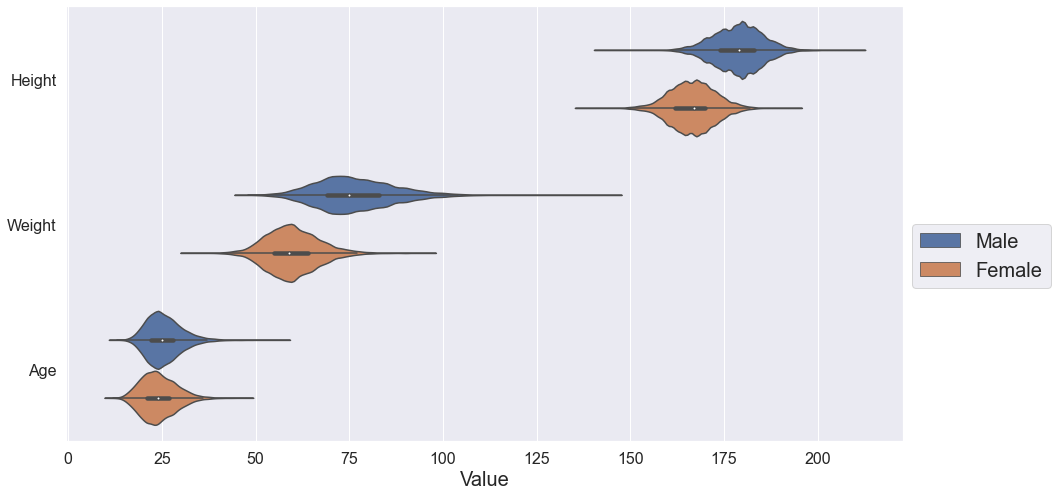

In [103]:
plt.figure(figsize=(15,8))
sns.violinplot(x = 'value', y = 'variable', data = groups, hue = 'Sex', fliersize = 1.5)
sns.set(style="darkgrid")
plt.ylabel('')
plt.xlabel('Value', size=20 )
plt.yticks(size=16)
plt.xticks(size=16)
plt.legend(bbox_to_anchor=(1.01,0.50), loc=2, borderaxespad=0.,  prop={'size': 20});